# Project Part II: Analysis

Team Member: Yihan Guo, Muyang Zhou, Jingxuan Wang

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import statsmodels.api as sm

## 1. Descriptive Statistics

In [3]:
# We use the dataset from Part I after cleaning, merging, and feature engineering on the original datasets.
df = pd.read_csv("../data/House_Pop_Cleaned.csv")

In [4]:
# Calculating descriptive statistics for key columns in the dataset

# Selecting relevant columns for descriptive analysis
columns_to_analyze = [
    'Price', 'Beds', 'Baths', 'Living Space', 
    'Zip Code Population', 'Zip Code Density', 
    'Median Household Income', 'City Population', 
    'City Density', 'City 2024 Change Rate', 'mean_price_city'
]

# Calculating descriptive statistics
descriptive_stats = df[columns_to_analyze].describe().T

# Adding range (max - min) for additional insight into data spread
descriptive_stats['range'] = descriptive_stats['max'] - descriptive_stats['min']

# Displaying descriptive statistics for user
descriptive_stats

,count,mean,std,min,25%,50%,75%,max,range
Price,36588.0,594068.389007,860146.783952,1950.000000,259900.000000,394900.00000,649000.000000,3.800000e+07,3.799805e+07
Beds,36588.0,3.165737,1.300052,1.000000,3.000000,3.00000,4.000000,5.400000e+01,5.300000e+01
Baths,36588.0,2.445583,1.317341,1.000000,2.000000,2.00000,3.000000,6.600000e+01,6.500000e+01
Living Space,36588.0,1882.220400,1200.704118,2.000000,1200.000000,1627.00000,2240.000000,7.434000e+04,7.433800e+04
Zip Code Population,36588.0,37124.617498,18352.979375,39.000000,23817.000000,34457.00000,46147.000000,1.164690e+05,1.164300e+05
Zip Code Density,36588.0,2328.830190,2667.031664,0.600000,989.600000,1641.10000,2716.600000,5.828960e+04,5.828900e+04
Median Household Income,36588.0,109630.805291,46912.332595,27475.000000,74894.000000,98898.00000,133779.000000,3.899280e+05,3.624530e+05
City Population,36588.0,787812.082814,595799.803454,117214.000000,480194.000000,559266.00000,923164.000000,8.097282e+06,7.980068e+06
City Density,36588.0,4780.102301,3397.092704,754.000000,2434.000000,3632.00000,5375.000000,2.695000e+04,2.619600e+04
City 2024 Change Rate,36588.0,-0.000398,0.008587,-0.025400,-0.006500,0.00030,0.004800,2.760000e-02,5.300000e-02


**House Prices Column**: The average house price is $594068, with a very high standard deviation of $860146, indicating a wide range of prices. The mean price is higher than the median price ($594068 > $394900), indicating a right-skewed distribution. It suggests that there are some very high-value properties affecting the average. The significant variablity in house prices likely influenced by location and housing characteristics.

**Beds and Baths Column**: Most properties have an average of 3 beds and 2.4 baths, with the upper extremes going as high as 54 beds and 66 baths, likely reflecting a few exceptionally large or luxury properties.

**Living Space Column**: The mean living space is about 1882 sq ft, but there's significant variability, with some properties being very large (up to 74340 sq ft), and some properties very small (down to 2 sq ft).

**Population and Density**: From the statistics, there is a significant wide range of population sizes. Both Zip Code Population and City Population statistics show that areas vary greatly, with densities ranging from sparsely populated areas to highly dense urban zones (up to 58289 people per square mile at the zip code level).

**Median Household Income Column**: The median household income varies widely, the min median household income is $27475, and the max median household income is $389928. This range might indicates socioeconomic diversity across zip codes and cities.

##  2. Inferential Statistics
**Approach**

- Linear Regression
- Anova
- Chi-Square

### Linear Regression Analysis of City Density and Mean House Prices
Linear regression provides a direct and interpretable way to measure the effect of city density on house price variation, capturing the correlation between the two variables. It offers both quantitative and statistical insights into how changes in density are associated with changes in house prices.

null hypothesis: There is no linear relationship between city density and mean price. \
$H_0$: $\beta_1$ = 0 \
alternative hypothesis: There is a linear relationship between city density and mean price. \
$H_1$: $\beta_1$ $\neq$ 0

In [5]:
mean_price_city = df.groupby("City")["Price"].mean().reset_index()
city_population = df.groupby("City")["City Density"].first().reset_index()
X = city_population['City Density']
X_const = sm.add_constant(X)
y = mean_price_city['Price']
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     26.38
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           3.32e-06
Time:                        00:39:19   Log-Likelihood:                -865.41
No. Observations:                  61   AIC:                             1735.
Df Residuals:                      59   BIC:                             1739.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.828e+05   7.06e+04      5.426   

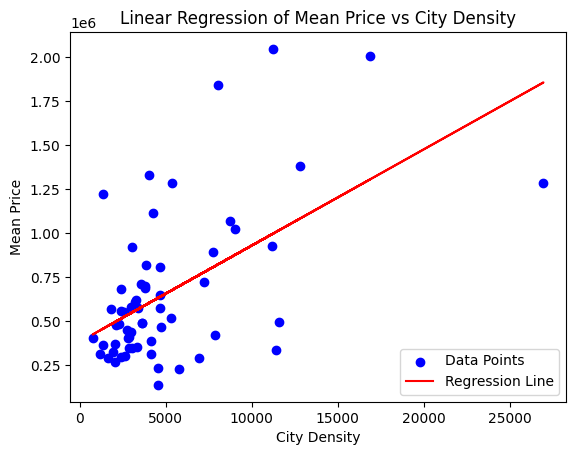

In [6]:
plt.scatter(X, y, color='blue', label='Data Points')
# Plot the regression line
y_pred = model.predict(X_const)
plt.plot(X, y_pred, color='red', label='Regression Line')
# Adding labels and title
plt.xlabel("City Density")
plt.ylabel("Mean Price")
plt.title("Linear Regression of Mean Price vs City Density")
plt.legend()
plt.show()

Since the p-value is less than 0.05, predictor (city density) has a statistically significant relationship with the outcome variable (mean price). In other words, city density is likely influencing mean price, and the observed relationship is unlikely to be due to random chance. We can reject the null hypothesis to in favor the alternative hypothesis.\
While the relationship is statistically significant, city density does not explain much of the variation in mean price. Specifically, a low $R^2$
implies that other factors (beyond city density) contribute to the variation in mean price.

---

### ANOVA Test to Compare Mean House Prices Between High-Density and Low-Density Cities
null hypothesis: The mean price is the same for both high-density and low-density cities. \
$H_0$: $\mu_{\text(high\_density\_city)} = \mu_{\text(low\_density\_city)}$ \
alternative hypothesis: There is a difference in mean price between high-density and low-density cities. \
$H_1$: $\mu_{\text(high\_density\_city)}$ $\neq$ $\mu_{\text(low\_density\_city)}$

I chose ANOVA because it allows me to test whether high-density and low-density cities have significantly different mean house prices. This approach effectively answers whether density levels are associated with variations in house prices, without assuming a specific linear relationship between the two variables. This method provides a statistically sound basis for concluding that population density may impact house prices.

In [7]:
# Calculate the mean of city densities for unique cities
mean_city_density = df['City Density'].mean()

# Define 'High' and 'Low' density categories based on the mean city density
df['Density Category'] = df['City Density'].apply(
    lambda x: 'High' if x >= mean_city_density else 'Low'
)

# Group mean prices by the new density categories
high_density_prices = df[df['Density Category'] == 'High']['Price']
low_density_prices = df[df['Density Category'] == 'Low']['Price']

# Perform one-way ANOVA between high and low density categories
anova_result_updated = stats.f_oneway(high_density_prices, low_density_prices)
anova_result_updated.pvalue, anova_result_updated.statistic
print('p-value', anova_result_updated.pvalue)
print('f-stats', anova_result_updated.statistic)

p-value 3.109355132065486e-275
f-stats 1278.409203945332


The F-statistic is very high, which indicates that the variance between the means of the two groups ("High" and "Low" density cities) is much larger than the variance within each group. There is a strong difference in mean prices between high-density and low-density cities. \
The p-value is extremely small (less than 0.05). This indicates that the observed difference in mean prices between high- and low-density cities is highly statistically significant and is very unlikely to have occurred by random chance.

---

### ANOVA Test to Compare Mean House Prices Between Cities with Growing and Declining Populations
null hypothesis: The mean price is the same for both growing population and declining population cities. \
$H_0$: $\mu_{\text(growing\_population\_city)} = \mu_{\text(declining\_population\_city)}$ \
alternative hypothesis: There is a difference in mean price between high-density and low-density cities. \
$H_1$: $\mu_{\text(growing\_population\_city)}$ $\neq$ $\mu_{\text(declining\_density\_city)}$

We chose ANOVA as the method to determine if mean house prices vary significantly across different city population growth rate categories. This method effectively answers whether growth rate categories are associated with house price differences, without requiring a linear relationship. ANOVA provides a clear test of significance for understanding if population growth rate impacts housing market trends across cities.

In [8]:
# Calculate the mean of city densities for unique cities
growing_cities = df[df['City 2024 Change Rate']>0]
declining_cities = df[df['City 2024 Change Rate']<0]

# Perform one-way ANOVA between high and low density categories
anova_result_updated = stats.f_oneway(growing_cities['Price'], declining_cities['Price'])
anova_result_updated.pvalue, anova_result_updated.statistic
print('p-value', anova_result_updated.pvalue)
print('f-stats', anova_result_updated.statistic)

p-value 0.3181800608347727
f-stats 0.9964400030928381


The ANOVA test compares the mean house prices between growing and declining cities. With a p-value of 0.318, which is greater than the typical significance level of 0.05, there is insufficient evidence to conclude a significant difference in average house prices between these two groups. The F-statistic of 0.996 further supports this, as it indicates a low level of variability between the groups relative to the variability within them.

---

### Chi-Squared Test to Analyze the Relationship Between Household Income Level and Housing Affordability Level
We want to know if there is a relationship between household income brackets and housing afforadbility. We will need to create two categorical features, household income levels and house price levels. Chi-squared test is useful when examing relationships between categorical variables, so we will conduct Chi-squared test for this analysis.

**Null Hypothesis (H₀)**: There is no association between household income levels and house price levles.

**Alternative Hypothesis (H₁)**: There is an association between household income levels and house price levels.

In [9]:
from scipy.stats import chi2_contingency
import pandas as pd
df['Income Label'] = pd.qcut(df['Median Household Income'], q=5, labels=["Low", "Medium Low", "Medium","Medium High", "High"])

# Creating a contingency table
contingency_table = pd.crosstab(df['Income Label'], df['Price Label'])

# Running the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}, P-value: {p}, Degrees of Freedom: {dof}")

Chi-squared: 18378.82024012813, P-value: 0.0, Degrees of Freedom: 16


The Chi-squared statistic is 18378.82, which means there is a large difference between observed and expected frequencies, suggesting a stronger association between the two variables, 'Income Label' and 'Price Label'. Since the p-values is extremely low (less than 0.05), we reject the null hypothesis. This means there is a statistically significant association between household income levels and house price levels. This finding suggests that income level likely influences housig afforadability and that certain income groups are more likely to be associated with specific price categories.

## 3. Graphical Analysis

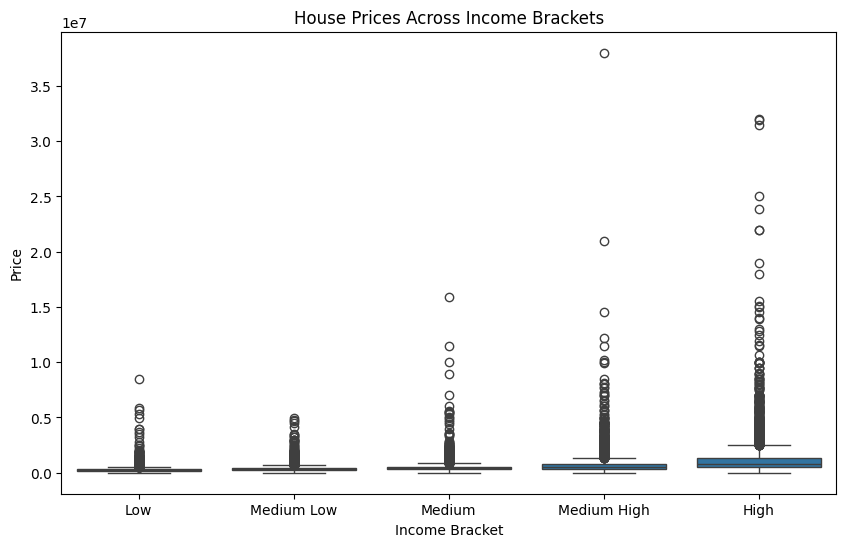

In [10]:
# Plotting Price distribution across different income brackets
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Income Label', y='Price')
plt.title('House Prices Across Income Brackets')
plt.xlabel('Income Bracket')
plt.ylabel('Price')
plt.show()

This box plot shows the distribution of house prices across different income brackets. However, this plot includes numerous outliers at the top, resulting the difficulty of interpreting the central tendencies and distribution of the majority of house prices. Therefore, we created another box plot by removing the outliers.

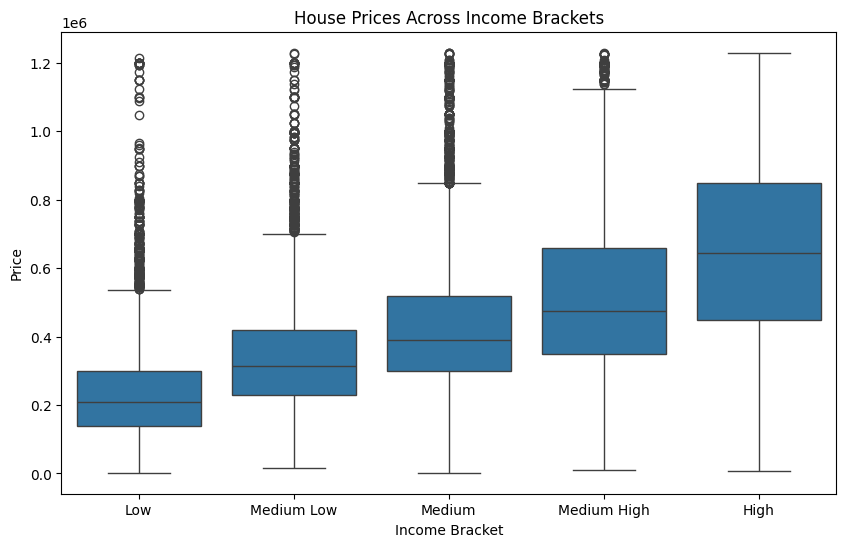

In [11]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df_no_outliers = df[(df['Price'] > lower_bound) & (df['Price'] < upper_bound)]

# Plotting Price distribution across different income brackets
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, x='Income Label', y='Price')
plt.title('House Prices Across Income Brackets')
plt.xlabel('Income Bracket')
plt.ylabel('Price')
plt.show()

To create a clearer view, we used theinterquartile range (IQR) method to remove outliers in the this plot because it is an easy and straight forward. The median house prices for each income bracket are now more visible and distinct. It is clear that higher income brackets generally have higher median house prices.

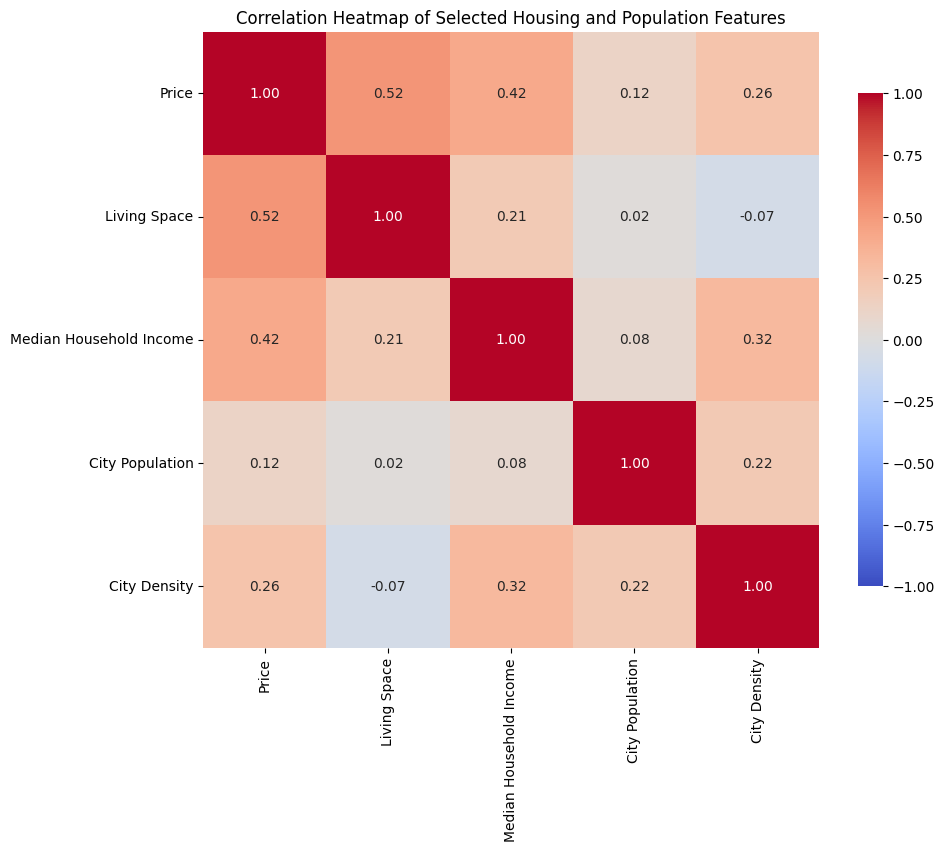

In [12]:
# Selecting relevant numerical features for the heatmap
selected_features = df[['Price','Living Space',                         
                          'Median Household Income', 'City Population', 
                          'City Density']]

# Calculating the correlation matrix
correlation_matrix = selected_features.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmax=1, vmin=-1, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Selected Housing and Population Features")
plt.show()

The heatmap shows moderate correlations between Price and features like Living Space (0.52) and Median Household Income (0.42), indicating that while these factors contribute to price, they don't fully explain its variation. Low correlations with City Population (0.12) and City Density (0.26) further suggest that no single feature can sufficiently predict Price.

The use of the Pearson correlation coefficient here highlights only linear relationships, meaning complex, non-linear effects aren’t captured. Thus, a combination of multiple features or a more complex model would likely be needed to accurately estimate Price.

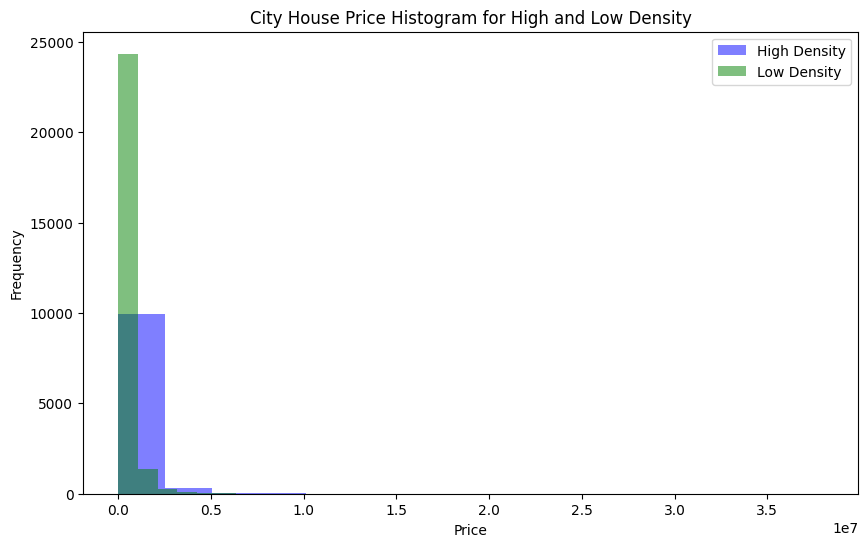

In [16]:
# plot histograms of high and low density prices
plt.figure(figsize=(10, 6))
plt.hist(high_density_prices, bins=15, color='blue', alpha=0.5, label='High Density')
plt.hist(low_density_prices, bins=15, color='green', alpha=0.5, label='Low Density')
plt.title('City House Price Histogram for High and Low Density')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The overlaid histogram suggests that, while both high-density and low-density cities have a concentration of lower-priced properties, low-density cities may have a higher concentration of houses at these lower price points.
The spread in the high-density cities may suggest a slightly broader range of prices, but the visualization is limited by the extreme values.

## 4. Comparative Analysis

In [45]:
# calculate the percentage of each price label in each state and plot the result
mean_state_density = df.groupby('State')['City Density'].mean().sort_values(ascending=False)/1e6

In [27]:
state_density = df.groupby('State')['City Density'].mean().sort_values(ascending=False)/1e4

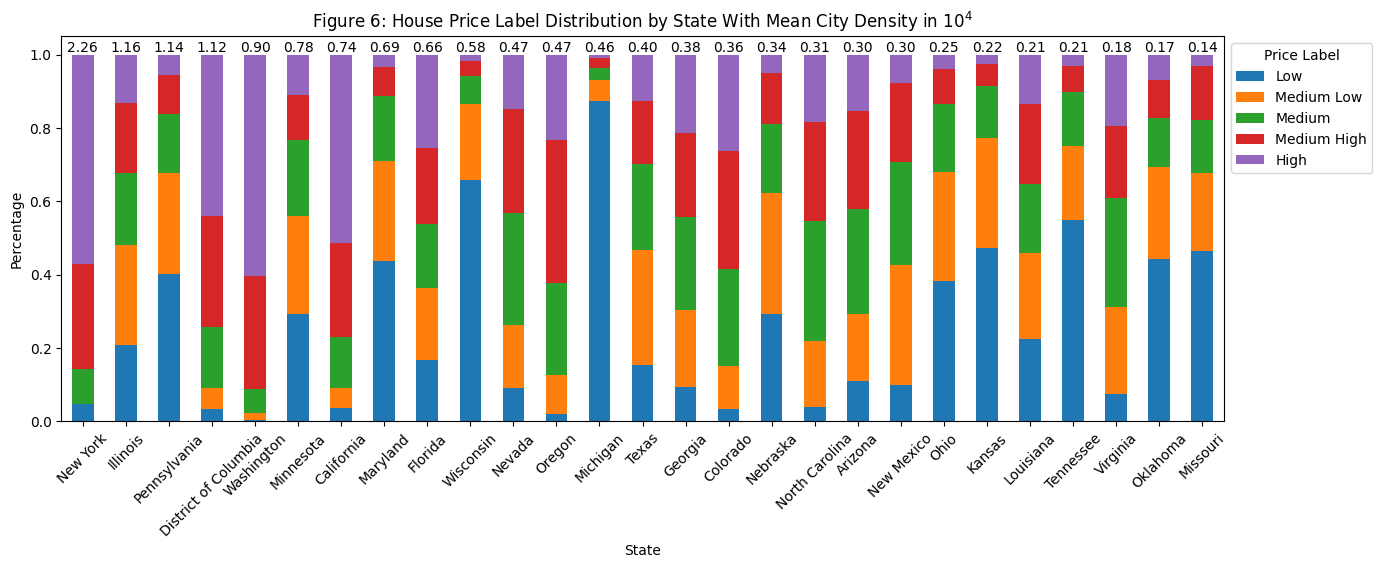

In [29]:
# calculate the percentage of each price label in each state and plot the result in density order
state_list = mean_state_density.index.tolist()
state_price = df.groupby("State")["Price Label"].value_counts(normalize=True).unstack()
state_price = state_price[['Low', 'Medium Low', 'Medium', 'Medium High', 'High']]
state_price = state_price.loc[state_list]
fig, ax = plt.subplots(figsize=(15, 5))
state_price.plot(kind='bar', stacked=True, ax=ax)
for i, (state, density) in enumerate(state_density.items()):
    ax.text(i, 1, f'{density:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.title("Figure 6: House Price Label Distribution by State With Mean City Density in $10^4$")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.legend(title='Price Label', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

This analysis highlights how, despite similar population densities, states can have vastly different housing affordability levels. Lower-density states generally offer more affordable options, though some, like California, show high prices even with a moderate density score due to local economic factors. However, among high-density states with similar mean city density, like Illinois, Pennsylvania, and DC exhibit notable differences in housing affordability: DC has a predominant concentration of "High" price labels, indicating high housing costs, while Illinois and Pennsylvania display a more balanced distribution with a significant share in the "Medium" and "Medium Low" categories, suggesting greater affordability and a wider range of housing options in these states compared to DC.

In [47]:
# Calculate the median of key variables for each price label category
# Reordering the index of the DataFrame to follow the specified order
price_label_order = ['High', 'Medium High', 'Medium', 'Medium Low', 'Low']
price_label_summary = df.groupby('Price Label',observed=False)[['Median Household Income', 'City Population', 'City Density',
                                                   'Living Space']].median().reindex(price_label_order)

print(price_label_summary)

             Median Household Income  City Population  City Density  \
Price Label                                                           
High                        149531.0         759915.0        5339.0   
Medium High                 119005.0         559266.0        3835.0   
Medium                       97311.0         548772.0        3358.0   
Medium Low                   86064.0         558736.0        3034.0   
Low                          66922.0         558736.0        3034.0   

             Living Space  
Price Label                
High               2428.0  
Medium High        1965.0  
Medium             1745.5  
Medium Low         1490.0  
Low                1164.0  


Becasue there are many outliers in the data, so we choose to compare median of key variables for each price label category.

In [48]:
# Define the variables to plot and their labels
variables = ['Median Household Income', 'City Population', 'City Density', 'Living Space']
y_labels = ['Median Household Income', 'City Population', 'City Density', 'Living Space']


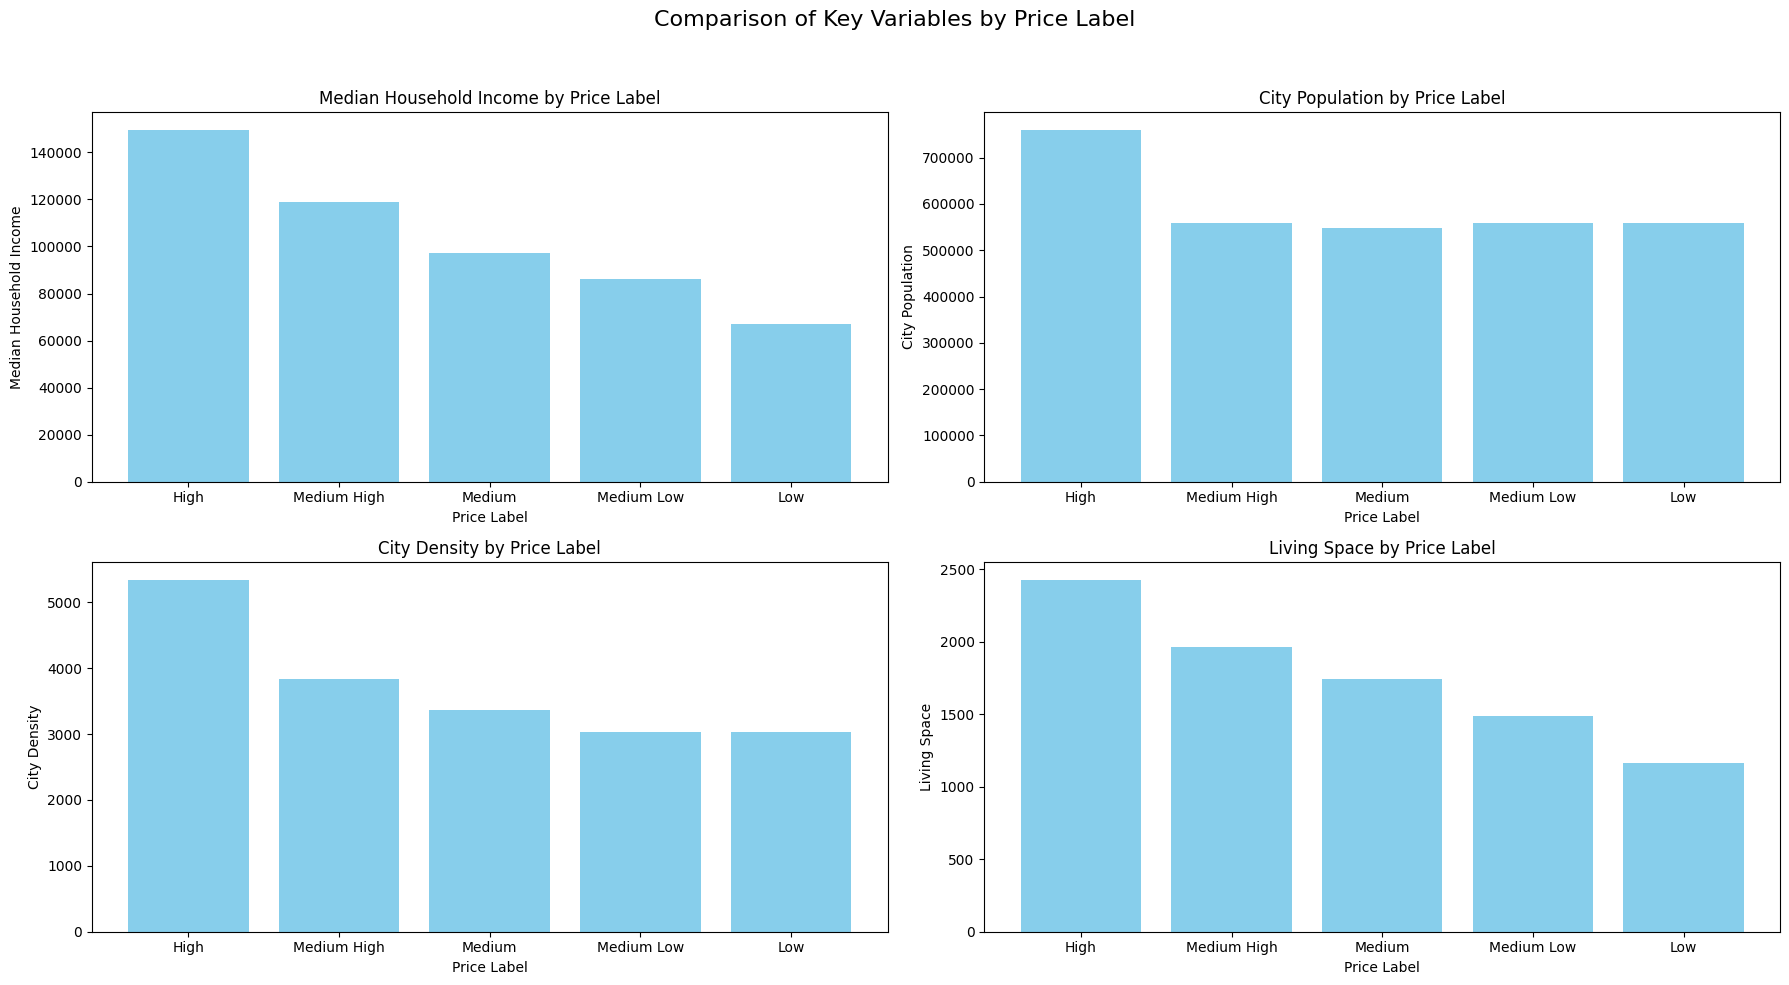

In [49]:
# Define the variables to plot and their labels
variables = ['Median Household Income', 'City Population', 'City Density', 'Living Space']
y_labels = ['Median Household Income', 'City Population', 'City Density', 'Living Space']

fig, axes = plt.subplots(2, 2, figsize=(18, 10))  # Adjust figure size as needed
fig.suptitle('Comparison of Key Variables by Price Label', fontsize=16)

# Loop through each variable and create a bar plot in the appropriate subplot
for i, (var, y_label) in enumerate(zip(variables, y_labels)):
    ax = axes[i // 2, i % 2]  # Calculate position in the 2x3 grid
    ax.bar(price_label_summary.index, price_label_summary[var], color='skyblue')
    ax.set_title(f'{y_label} by Price Label')
    ax.set_xlabel('Price Label')
    ax.set_ylabel(y_label)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()

Median Household Income by Price Label shows higher price labels are associated with higher median household income. It suggests that housing affordability correlates strongly with income.

In the City Population by Price Label plot, the 'High' price label has a higher city population than the other price labels. Interestingly, the rest four price labels have similar city population. So, at this time, analyzing city density might be better than city population. As expected, based on the City Density by Price Label plot, hihger density in high-priced areas might reflect urban environments where limited space and high demand push up prices.

For the plot of Living Space by Price Label, there is a clear increase in median living space as price labels move from low to high. This indicates size is a factor in determining price.

## 5. Multivariate Analysis

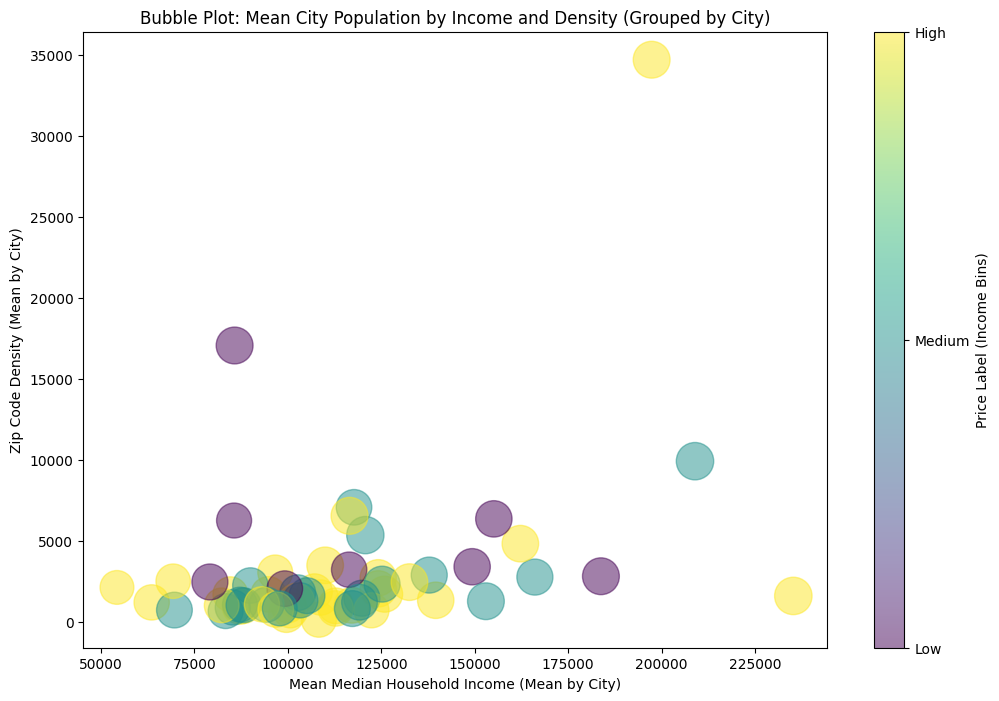

In [30]:
# Group by 'City' and compute the mean for 'Median Household Income', 'Zip Code Density', and 'City Population'
city_data = df.groupby('City').agg({
    'Median Household Income': 'mean',
    'Zip Code Density': 'mean',
    'Price': 'mean'
}).reset_index()

# Map 'Price Label' to the mean 'Median Household Income' for color coding
city_data['Price_Label_Code'] = pd.qcut(df['Price'], q=3, labels=[0, 1, 2])

# Plot bubble plot for grouped city data
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    city_data['Median Household Income'],
    city_data['Zip Code Density'],
    s=np.log(city_data['Price']) * 50,
    c=city_data['Price_Label_Code'].astype(int),
    alpha=0.5,
    cmap='viridis',
    marker='o'
)

# Adding colorbar and labels
cbar = plt.colorbar(scatter, ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])
cbar.set_label('Price Label (Income Bins)')

plt.xlabel('Mean Median Household Income (Mean by City)')
plt.ylabel('Zip Code Density (Mean by City)')
plt.title('Bubble Plot: Mean City Population by Income and Density (Grouped by City)')

plt.show()


The high house price cluster has a wider range of median household incomes. The diversity in household income within this cluster indicates that high house prices might not be exclusively tied to the highest income areas but could span a broad economic range. \
Cities within the medium house price cluster generally have a higher average household income than those in the high house price cluster. \
Cities in the low house price cluster tend to have higher population densities. This suggests that lower-priced housing areas may be more densely populated, which could reflect urban centers or regions with limited space and higher population pressures. \
The fact that high-priced housing areas span a wider income range might indicate that other factors, beyond just income, are contributing to housing affordability.

This plot suggests that higher-priced homes are generally found in lower-density areas, likely suburban or affluent districts where space and privacy are valued. In contrast, cities with medium to low-priced homes show a broader range in density, indicating that affordable housing exists across both high-density urban areas and lower-density rural settings. This pattern aligns with the idea that wealthier households often prefer suburban environments with fewer people, while lower-cost housing is spread across more varied settings.

In [51]:
df.head()

,Zip Code,Price,Beds,Baths,Living Space,City,State,Zip Code Population,Zip Code Density,County,...,Longitude,Rank,City Population,City 2024 Change Rate,City Density,City Area,Price Label,mean_price_city,Density Category,Income Label
0,10013,3999000.0,2,3,1967,New York,New York,29563,20967.9,New York,...,-74.00472,1,8097282,-0.0195,26950,300.46,High,1.285112e+06,High,High
1,10014,1650000.0,1,1,718,New York,New York,29815,23740.9,New York,...,-74.00601,1,8097282,-0.0195,26950,300.46,High,1.285112e+06,High,High
2,10014,760000.0,3,2,1538,New York,New York,29815,23740.9,New York,...,-74.00601,1,8097282,-0.0195,26950,300.46,High,1.285112e+06,High,High
3,10014,1100000.0,1,1,600,New York,New York,29815,23740.9,New York,...,-74.00601,1,8097282,-0.0195,26950,300.46,High,1.285112e+06,High,High
4,10017,764900.0,1,1,643,New York,New York,15514,20107.7,New York,...,-73.97260,1,8097282,-0.0195,26950,300.46,High,1.285112e+06,High,High


In [76]:
pivot_table = df.pivot_table(
    index='State', 
    columns='Price Label', 
    values='City 2024 Change Rate', 
    aggfunc='mean',
    observed=False
).fillna(0)

In [75]:
pivot_table

mean                                           
Price Label                Low Medium Low    Medium Medium High      High
State                                                                    
Arizona               0.004261   0.003951  0.004357    0.004579  0.004492
California           -0.000522  -0.001327 -0.000764   -0.003991 -0.010955
Colorado              0.002485   0.002569  0.003638    0.002412  0.001315
District of Columbia  0.004000   0.004000  0.004000    0.004000  0.004000
Florida               0.011319   0.011276  0.010876    0.010220  0.009850
Georgia               0.007100   0.007100  0.007100    0.007100  0.007100
Illinois             -0.009900  -0.009900 -0.009900   -0.009900 -0.009900
Kansas               -0.002007  -0.001970 -0.001667   -0.001641 -0.001600
Louisiana            -0.017500  -0.017500 -0.017500   -0.017500 -0.017500
Maryland             -0.010600  -0.010600 -0.010600   -0.010600 -0.010600
Michigan             -0.002700  -0.002700 -0.002700   -0.002700 -0.002700
Minnesota            -0.004400  -0.004400 -0.004400   -0.004400 -0.004400
Missouri             -0.002850  -0.002850 -0.002850   -0.002850 -0.002850
Nebraska             -0.006476  -0.006479 -0.006500   -0.006500 -0.006500
Nevada                0.007100   0.007176  0.007221    0.007100  0.007100
New Mexico           -0.002700  -0.002700 -0.002700   -0.002700 -0.002700
New York             -0.019500   0.000000 -0.006850   -0.019500 -0.013175
North Carolina        0.012461   0.012307  0.012379    0.012387  0.012288
Ohio                 -0.003000  -0.003000 -0.003000   -0.003000 -0.003000
Oklahoma              0.003058   0.003399  0.003211    0.002015  0.001104
Oregon               -0.012100  -0.012100 -0.012100   -0.012100 -0.012100
Pennsylvania         -0.010800  -0.010800 -0.010800   -0.010800 -0.010800
Tennessee            -0.008900  -0.008900 -0.008900   -0.008374 -0.008900
Texas                 0.004630   0.005665  0.005712    0.004398  0.003690
Virginia             -0.004400  -0.004400 -0.004325   -0.004400 -0.004400
Washington            0.006400   0.006400  0.006400    0.006400  0.006400
Wisconsin            -0.009400  -0.009400 -0.009400   -0.009400 -0.009400

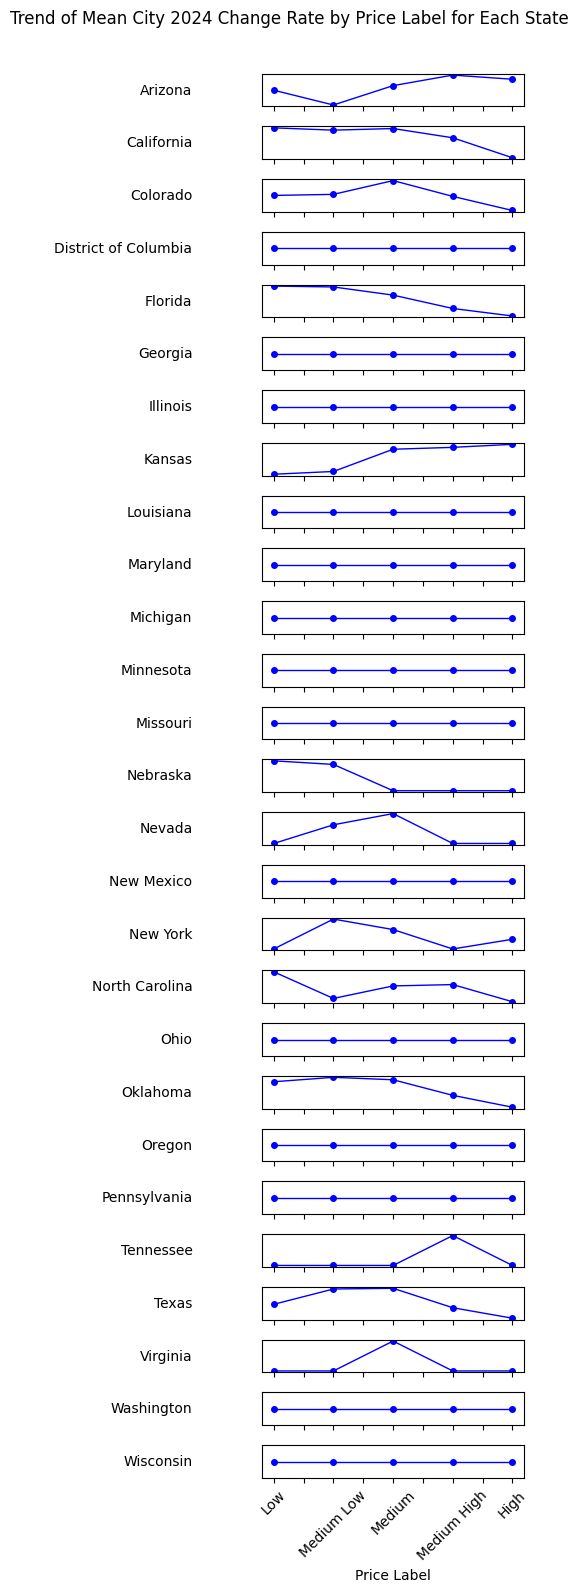

In [82]:
import matplotlib.pyplot as plt

# Set up the figure with taller, narrower subplots
num_states = pivot_table.shape[0]
fig, axes = plt.subplots(num_states, 1, figsize=(5, num_states * 0.6), sharex=True)
fig.suptitle("Trend of Mean City 2024 Change Rate by Price Label for Each State")

# Plot each state's trend without normalization and add a line at y=0
for i, (state, row) in enumerate(pivot_table.iterrows()):
    ax = axes[i]
    row.plot(kind='line', marker='o', ax=ax, color='b', markersize=4, linewidth=1)
    ax.set_ylabel(state, rotation=0, labelpad=50, ha='right', va='center')
    ax.set_yticks([])
    ax.set_xlabel('')

plt.xlabel("Price Label")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



This pattern suggests that housing prices influence population change rates differently across states. In some states, there is a trend where population change rates decline as housing prices increase, potentially indicating that high costs drive people to move elsewhere. Conversely, in other states, population change rates rise with higher housing prices, which could indicate strong housing demand due to inward migration, confidence in the city's economic growth, or optimism about the housing market that encourages investment. These trends reflect how housing affordability and market dynamics shape people's living and migration decisions, with high prices either attracting or deterring residents depending on local economic and social conditions.

## 6. Synthesis

## 7. Reflection

**Analyzing Process and Challenges**: During this process of analyzing the data, we explored the relationships between housing prices, household income levels, and population characteristics. Analyzing this data helped reveal patterns across various price categories and demographic factors. Throughout the analysis, we have keep modifying our approaches to make them clear and easier to understand. When revealing patterns in housing prices by comparing various key variables; initially, we grouped the data by Price Label to calculate the median values of key variables such as Median Household Income, City Population, and City Density. While the median summary gave us a good starting point, it wasn’t visually intuitive for identifying trends across categories. To make these patterns clearer, we decided to create bar plots for each variable, allowing for a straightforward comparison across price labels. This approach made it easier to visually assess relationships between housing prices, income, and population density. When visualizing the House Price Label Distribution by State, we experimented with the order of states. Initially, we ordered the states by the mean Price in each category. However, this ordering didn’t provide clear insights into regional or urban-rural differences. Instead, we chose to order the states by mean City Density, which highlighted the variations in housing affordability more effectively. This arrangement allowed us to observe how housing prices are distributed in high-density versus low-density states. We have also been through many challenges during this analyzing process. One of the main challenges was determining when to include or exclude outliers. Given the nature of real estate prices, there were numerous extreme values in the dataset, representing luxury properties or high-value homes, which led to a heavily skewed distribution. In some parts of the analysis, such as regression analysis, we chose to retain outliers because they reflect the true range of housing prices and are essential for understanding the overall market, including high-value segments. Removing them in this context could have led to an incomplete or biased model that doesn’t account for the full variability in prices. However, for visualizations, such as the box plot of house prices across income brackets, we found that outliers significantly impacted the readability of the plots, making it difficult to observe the general trends. To improve visual clarity, we applied the IQR method to filter out extreme values, which allowed for a more interpretable display of typical price distributions across income brackets.

**Limitation and Further Improvement**: The analysis was limited by the lack of historical data, which restricted the ability to examine trends over time. Additionally, while population density and income provided valuable insights, other important factors like housing supply, quality, and neighborhood amenities were not included, which could have given a fuller picture of the housing market dynamics. Further research could benefit from a more comprehensive dataset that includes historical prices and additional socio-economic factors. Additionally, using market-based price categories rather than quantiles might provide a more realistic segmentation of housing affordability.
